Explore the dataset about sales data for one store and predict total sale value for a customer using regression.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

test = pd.read_csv('/content/drive/My Drive/CBD 2214/test.csv',header=0)
train = pd.read_csv('/content/drive/My Drive/CBD 2214/train.csv',header=0)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = train

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data.shape

(550068, 12)

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
data.isnull().sum()/data.shape[0] *100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [ ]:
# Only product_category_1 and product_category_2 have null values
# Denoting none of the customers have purchased the product- Let's replace that with '0'
data['Product_Category_2'].fillna(0,inplace=True)
data['Product_Category_3'].fillna(0,inplace=True)

In [ ]:
data.isnull().sum()/data.shape[0] *100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

Total number of USER_ID:  5891


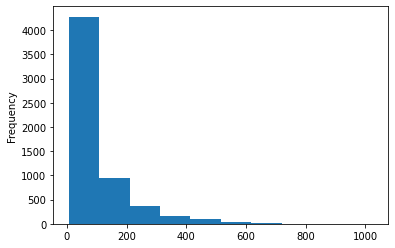

In [ ]:
print("Total number of USER_ID: ", data['User_ID'].nunique())
# It seems a repeadted purchases on the same user id as it near to 6000 while the data is for 5 lakhs
# Other possiblitity only 1% have a unique user_id
data['User_ID'].value_counts().plot(kind='hist')

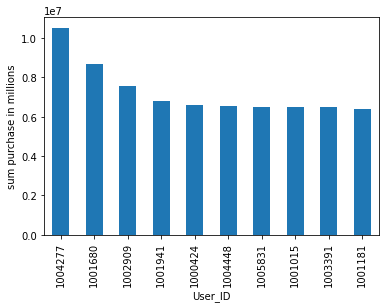

In [ ]:
data.groupby(['User_ID'])['Purchase'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("User_ID")
plt.ylabel("sum purchase in millions")
plt.show()

Total number of product_id : 3631


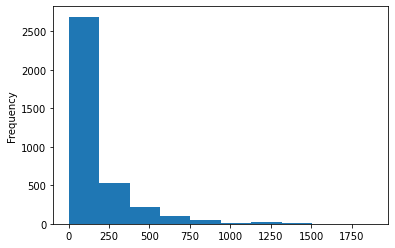

In [ ]:
print("Total number of product_id :",data['Product_ID'].nunique())
data['Product_ID'].value_counts().plot(kind='hist')  # Only certain Product are contributing more

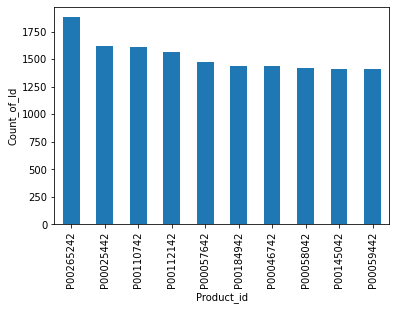

In [ ]:
ss= data['Product_ID'].value_counts()[:10]
ss.plot(kind='bar')  
plt.xlabel("Product_id")
plt.ylabel("Count_of_Id")
plt.show()

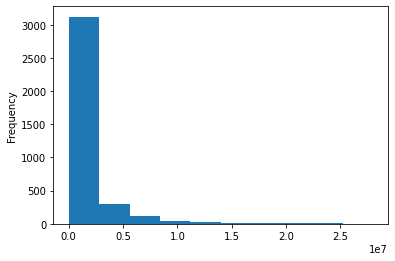

In [ ]:
data.groupby(['Product_ID'])['Purchase'].sum().plot(kind='hist')

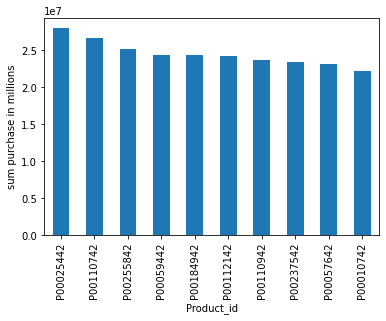

In [ ]:
data.groupby(['Product_ID'])['Purchase'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("Product_id")
plt.ylabel("sum purchase in millions")
plt.show()

### Gender

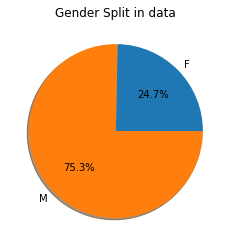

In [ ]:
data_Sex = data.groupby('Gender')['Gender'].count()
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})
plt.pie(data_Sex['Count'],labels = data_Sex['Sex'],autopct='%1.1f%%',shadow=True);
plt.title('Gender Split in data');


Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


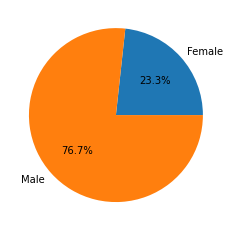

In [ ]:
print(data.groupby(['Gender'])['Purchase'].sum())
data_GP=data.groupby(['Gender'])['Purchase'].sum()
plt.pie(data_GP,autopct='%1.1f%%',labels=['Female','Male'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


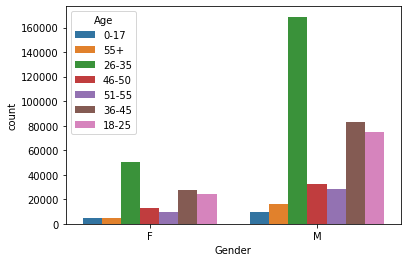

In [ ]:
sns.countplot(data['Gender'],hue=data["Age"])

### Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


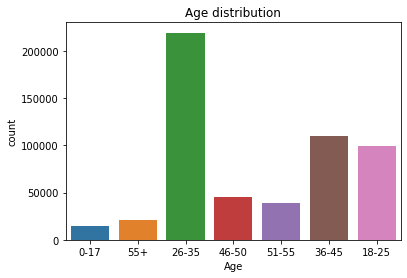

In [ ]:
sns.countplot(data['Age'])
plt.title("Age distribution")
plt.show()

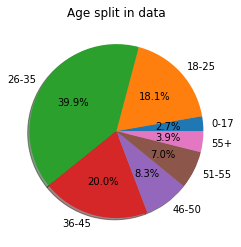

In [ ]:
data_Age = data.groupby('Age')['Age'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
plt.pie(data_Age['Count'],labels = data_Age['Age'],autopct='%1.1f%%',shadow=True);
plt.title('Age split in data');
plt.show()

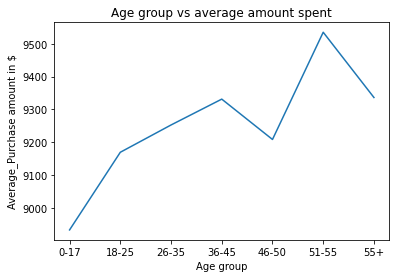

In [ ]:
data.groupby('Age')['Purchase'].mean().plot()
plt.xlabel('Age group')
plt.ylabel('Average_Purchase amount in $')
plt.title('Age group vs average amount spent')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


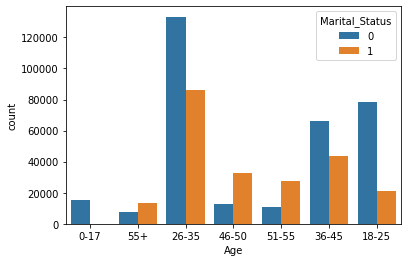

In [ ]:
sns.countplot(data['Age'],hue=data["Marital_Status"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


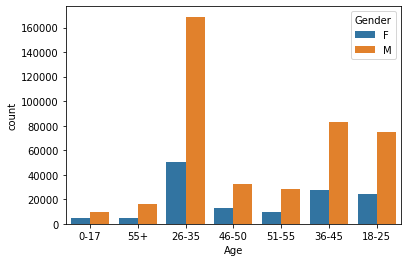

In [ ]:
sns.countplot(data['Age'],hue=data["Gender"])

Inference:
- 26-35 age group where they contribute around 40% and sum of their purchases are more even though they are small- (Unmarried)
- While Unmarried are more in the contribution

### City Category

City wise Contribution B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


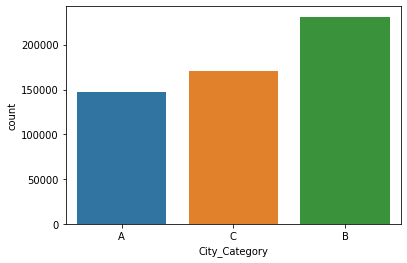

In [ ]:
print("City wise Contribution", data['City_Category'].value_counts(normalize=True) *100)
sns.countplot(data['City_Category'])

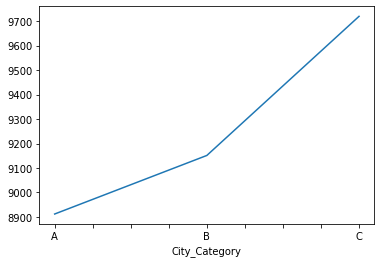

In [ ]:
data.groupby('City_Category')['Purchase'].mean().plot()

Inference:
- Even the number of count in the city b is more, purchase wise City C is contributing more.

### Occupation                  

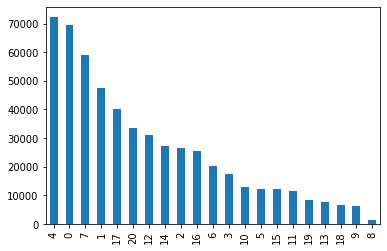

In [ ]:
data['Occupation'].value_counts().plot(kind='bar')

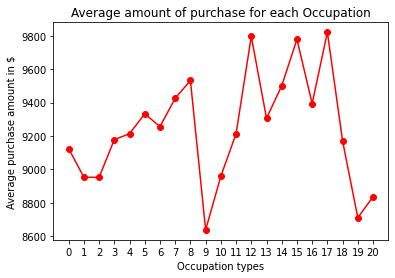

In [ ]:
OS= data.groupby(['Occupation'])['Purchase'].mean()
plt.plot(OS.index,OS.values,'ro-')
plt.xticks(OS.index)
plt.xlabel('Occupation types')
plt.ylabel('Average purchase amount in $')
plt.title('Average amount of purchase for each Occupation')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


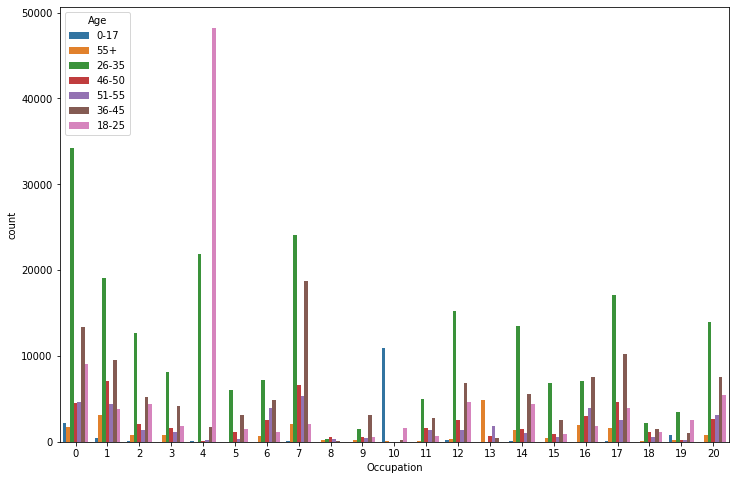

In [ ]:
plt.figure(figsize=[12,8])
sns.countplot(data['Occupation'],hue=data["Age"])

Inference
- Occupation 4 which is of more count as more number of youngsters- We can focus on the product of their interest in relation to their occupation
- Age group"26-35" are almost high in every categories as they contribute 40% of the total ages, yet the puchase amount is less if we can attract them we can surely increase the sales by 5-10%

### Stay_In_Current_City_Years

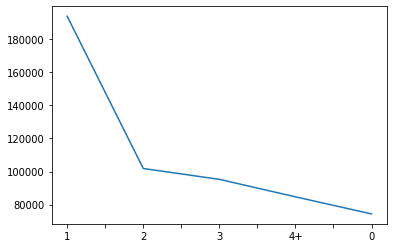

In [ ]:
data['Stay_In_Current_City_Years'].value_counts().plot()

In [ ]:
data1= data.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index()
data2= data['Stay_In_Current_City_Years'].value_counts()
data2=pd.DataFrame({"Stay_In_Current_City_Years":data2.index, "Count":data2.values})
nw_data = pd.merge(data1,data2,left_on='Stay_In_Current_City_Years',right_on='Stay_In_Current_City_Years',how = 'left');

nw_data = nw_data.sort_values(['Stay_In_Current_City_Years'],ascending=False)[0:10];
nw_data

,Stay_In_Current_City_Years,Purchase,Count
4,4+,785884390,84726
3,3,884902659,95285
2,2,949173931,101838
1,1,1792872533,193821
0,0,682979229,74398


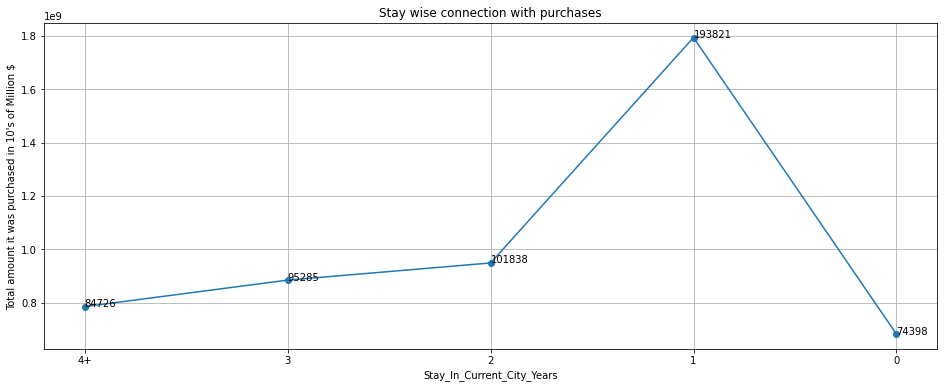

In [ ]:
    
plt.figure(figsize=(16,6));
plt.grid();
plt.plot(nw_data['Stay_In_Current_City_Years'],nw_data['Purchase'],'o-');
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Total amount it was purchased in 10\'s of Million $');
plt.title('Stay wise connection with purchases');
for a,b,c in zip(nw_data['Stay_In_Current_City_Years'], nw_data['Purchase'], nw_data['Count']): 
  plt.text(a, b+100000, str(c))  
plt.show();


Inference
- Here you can observe that the person staying 1 year are on the exploration state
- As the stay increases the purchase amount decreases maybe they have got all the stuff needed are we need to understand there requirements

### Marital_Status

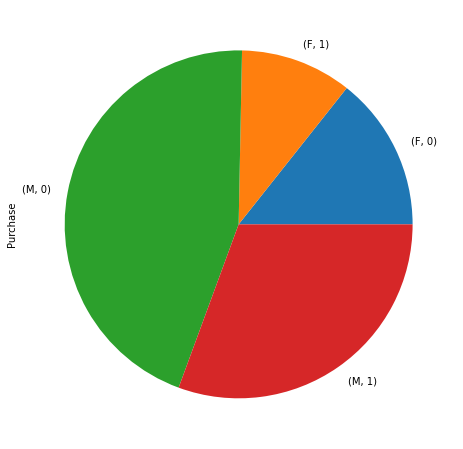

In [ ]:
data.groupby(['Gender','Marital_Status'])['Purchase'].count().plot(kind='pie',figsize=(8,8))

Count of martial_status Marital_Status
0    324731
1    225337
Name: Purchase, dtype: int64
Average purchase amount Gender  Marital_Status
F       0                 8679.845815
        1                 8810.249789
M       0                 9453.756740
        1                 9413.817605
Name: Purchase, dtype: float64


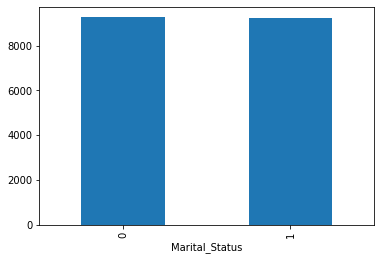

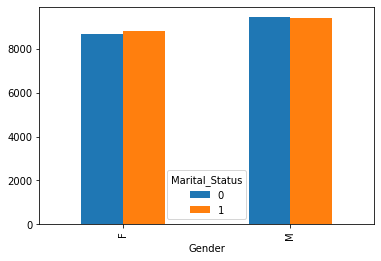

In [ ]:
print("Count of martial_status", data.groupby(['Marital_Status'])['Purchase'].count())
print("Average purchase amount", data.groupby(['Gender','Marital_Status'])['Purchase'].mean())
data.groupby(['Marital_Status'])['Purchase'].mean().plot(kind='bar')
data.groupby(['Gender','Marital_Status'])['Purchase'].mean().unstack().plot(kind='bar')
plt.show()


Inference

- Unmarried count is more with both Male and Female genders - Overall purchase amount is same
- No special concentration required, show equal importance

### Product_Categories

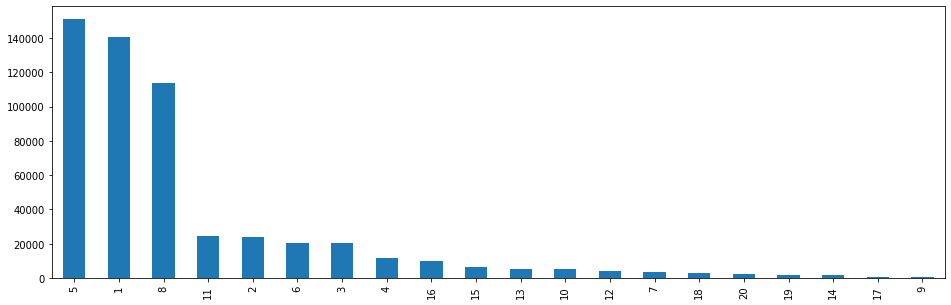

In [ ]:
data['Product_Category_1'].value_counts().plot(kind= 'bar', figsize=(16,5))

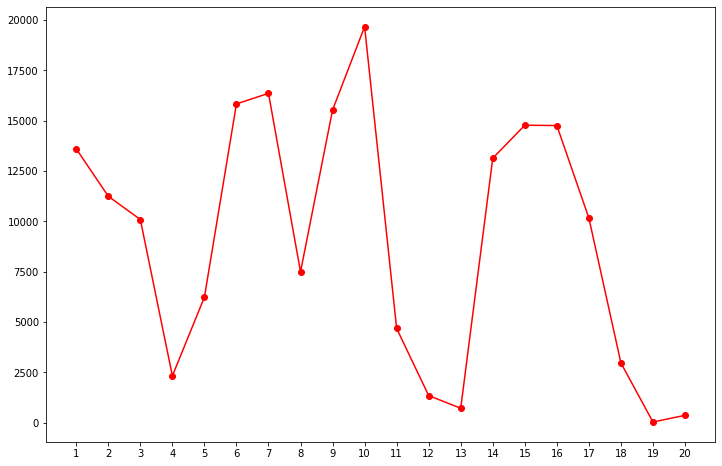

In [ ]:
PC1= data.groupby('Product_Category_1')['Purchase'].mean()
plt.figure(figsize=(12,8))
plt.plot(PC1.index,PC1.values,'ro-')
plt.xticks(PC1.index)
plt.show()

Inference:
- Product_catergory_1 ranges from (1000-20000)
- In product catergory 1 --> Count wise (5,1,8) contributes to the most, Purchase Amount wise(10,9,7,6) contribues more
- It may its a costly item 

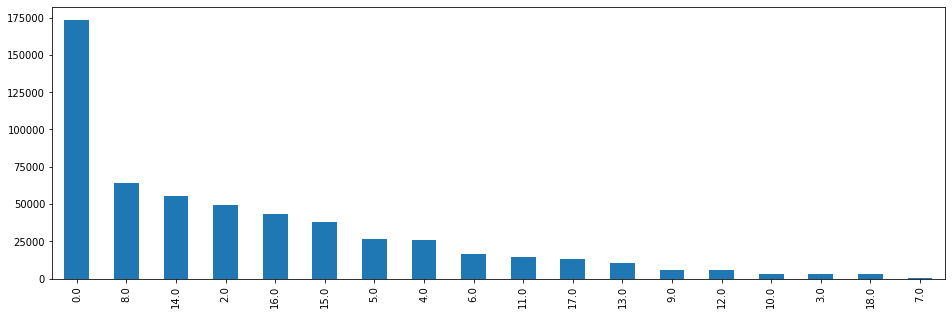

In [ ]:
data['Product_Category_2'].value_counts().plot(kind= 'bar', figsize=(16,5))

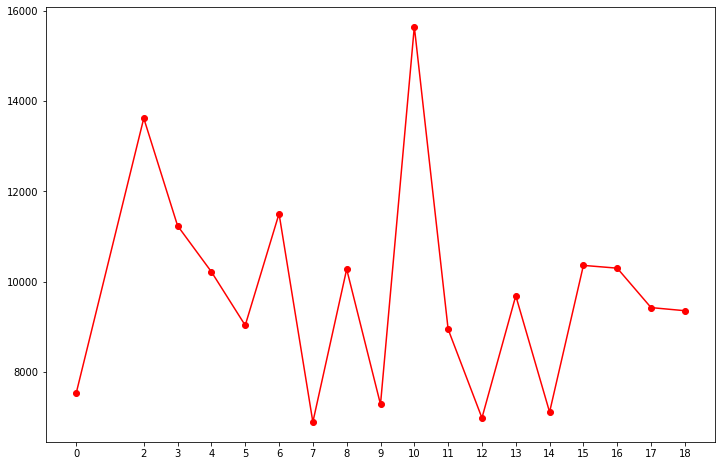

In [ ]:
PC2= data.groupby('Product_Category_2')['Purchase'].mean()
plt.figure(figsize=(12,8))
plt.plot(PC2.index,PC2.values,'ro-')
plt.xticks(PC2.index)
plt.show()

Inference:
- Product_catergory_2 ranges from (7000-16000)
- In product_2 category "10" contributes the wide range of purchase amount

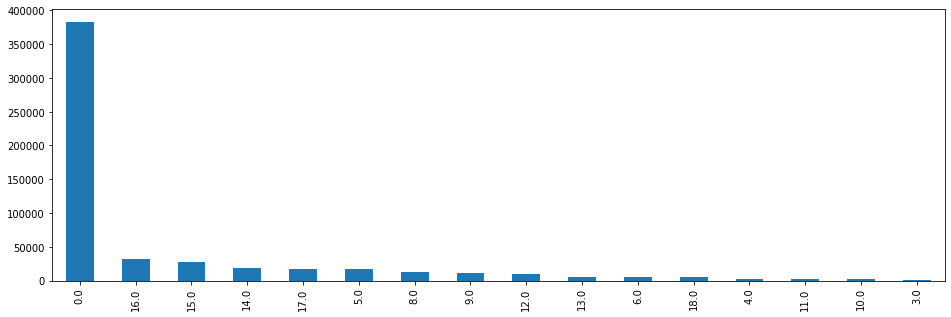

In [ ]:
data['Product_Category_3'].value_counts().plot(kind= 'bar', figsize=(16,5))

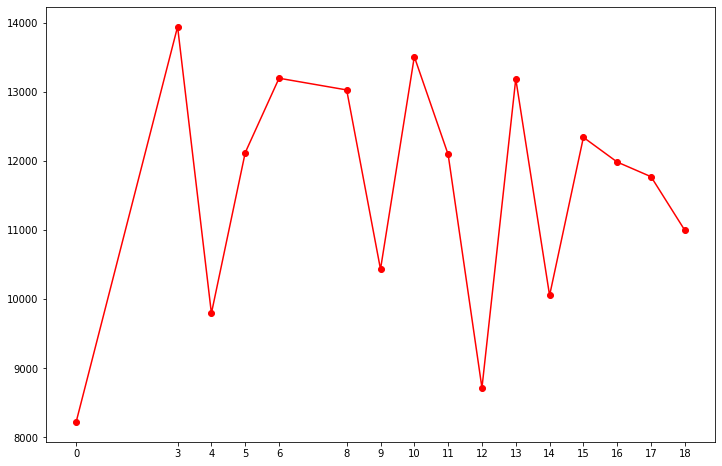

In [ ]:
PC3= data.groupby('Product_Category_3')['Purchase'].mean()
plt.figure(figsize=(12,8))
plt.plot(PC3.index,PC3.values,'ro-')
plt.xticks(PC3.index)
plt.show()

Inference:
- Product_catergory_3 ranges from (9000-14000)
- Product_categor_3 have a diverese range of product with the least contribution on "12" check on that.

### Purchases

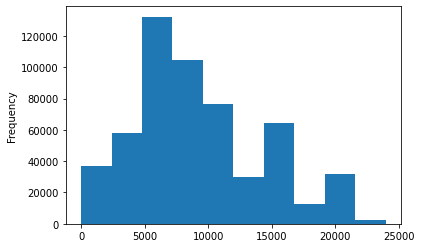

In [ ]:
data['Purchase'].plot(kind='hist')

Inference- 
- Purchase peak is arround 5000 and 10000 more in relation to the count

As we can observe there is multicollinearity between product_Catory 1 ,2 and 3

### Preparing the data for the model

In [ ]:
df= data.copy(deep=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)

In [ ]:
df['Gender'].replace({"M":1,"F":0},inplace=True)

In [ ]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6

In [ ]:
df['Age']=df['Age'].apply(map_age)

In [ ]:
print(df['Product_Category_2'].describe())
print(df['Product_Category_3'].describe())

count    550068.000000
mean          6.735436
std           6.215492
min           0.000000
25%           0.000000
50%           5.000000
75%          14.000000
max          18.000000
Name: Product_Category_2, dtype: float64
--------------------------------
count    550068.000000
mean          3.841941
std           6.250712
min           0.000000
25%           0.000000
50%           0.000000
75%           8.000000
max          18.000000
Name: Product_Category_3, dtype: float64


In [ ]:
df['Product_Category_2']=df['Product_Category_2'].fillna(9.0).astype(int)
df['Product_Category_3']=df['Product_Category_3'].fillna(13.0).astype(int)

In [ ]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df['City_Category']=df['City_Category'].map({"B":1,"A":2,"C":3})

In [ ]:
df['City_Category']= df['City_Category'].astype(int)

In [ ]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].astype(int)

In [ ]:
ddf=df.copy()

In [ ]:
df = df.drop(["User_ID","Product_ID"],axis=1)

### Modelling & Validating

In [ ]:
# X and Y split -- train_test_split

from sklearn.model_selection import train_test_split
X = df.drop("Purchase",axis=1)
y = df['Purchase']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Base Model- Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
dtr= DecisionTreeRegressor()

In [ ]:
dtr.fit(X_train,y_train)
d_predict= dtr.predict(X_test)

In [ ]:
print("RMSE score for Decision Tree : ", np.sqrt(mean_squared_error(y_test,d_predict)))

RMSE score for Decision Tree :  3365.632518381046


### Trying Other models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [ ]:
rfc=RandomForestRegressor(n_estimators=150)
gbr=GradientBoostingRegressor()
import xgboost as xgb 
xg=xgb.XGBRegressor()

In [ ]:
rfc.fit(X_train, y_train)
r_predict= rfc.predict(X_test)

In [ ]:
gbr.fit(X_train,y_train)
g_predict= gbr.predict(X_test)

In [ ]:
xg.fit(X_train, y_train)
xg_predict= xg.predict(X_test)

[14:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Performance check

In [ ]:
print("RMSE score for Random_Forest : ", np.sqrt(mean_squared_error(y_test,r_predict)))
print("RMSE score for Gradient Boosting : ", np.sqrt(mean_squared_error(y_test,g_predict)))
print("RMSE score for Extreme Gradient Boosting : ", np.sqrt(mean_squared_error(y_test,xg_predict)))

RMSE score for Random_Forest :  3050.9148289869995
RMSE score for Gradient Boosting :  2981.680421474055
RMSE score for Gradient Boosting :  2979.536120999135
